In [135]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

In [136]:
db = {'person':[], 'country': [], 'salary': [], 'age': [], 'sex': []}

In [137]:
db['person'] = list(range(1000))
db['country'] = list(np.random.choice(['US', 'UK', 'IN', 'FR', 'DE'], size=1000))
for i in range(1000):
    if db['country'][i] in ['US', 'UK', 'FR', 'DE']:
        db['sex'].append(np.random.choice(['M', 'F'], p=[0.40, 0.60]))
    else:
        db['sex'].append(np.random.choice(['M', 'F'], p=[0.55, 0.45]))
for i in range(1000):
    if db['country'][i] == 'US':
        if db['sex'][i] == 'M':
            db['salary'].append(np.random.randint(8000, 16000))
        else:
            db['salary'].append(np.random.randint(2000, 7000))
    elif db['country'][i] == 'UK':
        if db['sex'][i] == 'M':
            db['salary'].append(np.random.randint(6000, 13000))
        else:
            db['salary'].append(np.random.randint(6000, 11000))
    elif db['country'][i] == 'IN':
        if db['sex'][i] == 'M':
            db['salary'].append(np.random.randint(600, 1300))
        else:
            db['salary'].append(np.random.randint(100, 200))
    elif db['country'][i] == 'FR':
        if db['sex'][i] == 'M':
            db['salary'].append(np.random.randint(2100, 6000))
        else:
            db['salary'].append(np.random.randint(2200, 6300))
    else:
        if db['sex'][i] == 'M':
            db['salary'].append(np.random.randint(2500, 6600))
        else:
            db['salary'].append(np.random.randint(2800, 6900))
for i in range(1000):
    if db['salary'][i] < np.random.randint(3000, 4500):
        db['age'].append(np.random.randint(22, 35))
    else:
        db['age'].append(np.random.randint(35, 65))
df = pd.DataFrame(db)
df.head()

,person,country,salary,age,sex
0,0,FR,4043,45,M
1,1,UK,12848,56,M
2,2,UK,9587,62,F
3,3,US,8461,41,M
4,4,DE,4811,36,F


In [138]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

# columns
cat_cols = ["country", "sex"]
num_cols = ["salary", "age"]

pre = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols),
    ("num", StandardScaler(), num_cols),
])

kmeans = KMeans(n_clusters=5, n_init="auto", random_state=0)

pipe = Pipeline([
    ("prep", pre),
    ("clu", kmeans),
])

df["cluster"] = pipe.fit_predict(df[cat_cols + num_cols])
df.head()


,person,country,salary,age,sex,cluster
0,0,FR,4043,45,M,0
1,1,UK,12848,56,M,2
2,2,UK,9587,62,F,3
3,3,US,8461,41,M,2
4,4,DE,4811,36,F,4


In [139]:
np.unique(df["cluster"], return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([133, 201, 137, 293, 236]))

In [140]:
df['prob'] = list(np.random.rand(1000))

In [141]:
for i in range(1000):
    if df.cluster[i] == 0:
        df['prob'][i] = np.random.uniform(0.7, 1.0)
    elif df.cluster[i] == 1:
        df['prob'][i] = np.random.uniform(0.5, 0.8)
    elif df.cluster[i] == 2:
        df['prob'][i] = np.random.uniform(0.3, 0.6)
    elif df.cluster[i] == 3:
        df['prob'][i] = np.random.uniform(0.1, 0.4)
    else:
        df['prob'][i] = np.random.uniform(0.0, 0.2)

In [142]:
df.head(10)

,person,country,salary,age,sex,cluster,prob
0,0,FR,4043,45,M,0,0.822274
1,1,UK,12848,56,M,2,0.305169
2,2,UK,9587,62,F,3,0.384168
3,3,US,8461,41,M,2,0.310268
4,4,DE,4811,36,F,4,0.039170
5,5,DE,5538,56,M,0,0.789221
6,6,FR,5525,41,M,0,0.739777
7,7,FR,3513,27,F,4,0.099141
8,8,IN,1152,27,M,1,0.747374
9,9,DE,4395,41,F,3,0.339698


In [143]:
df['tup_prov'] = ['t'+str(i) for i in range(len(df))]
df['block_prov'] = ['b'+str(df['cluster'][i]) for i in range(len(df))]

In [144]:
df.head(20)

,person,country,salary,age,sex,cluster,prob,tup_prov,block_prov
0,0,FR,4043,45,M,0,0.822274,t0,b0
1,1,UK,12848,56,M,2,0.305169,t1,b2
2,2,UK,9587,62,F,3,0.384168,t2,b3
3,3,US,8461,41,M,2,0.310268,t3,b2
4,4,DE,4811,36,F,4,0.039170,t4,b4
5,5,DE,5538,56,M,0,0.789221,t5,b0
6,6,FR,5525,41,M,0,0.739777,t6,b0
7,7,FR,3513,27,F,4,0.099141,t7,b4
8,8,IN,1152,27,M,1,0.747374,t8,b1
9,9,DE,4395,41,F,3,0.339698,t9,b3


In [145]:
block_prov_map = {b:df[df['block_prov']==b]['tup_prov'].tolist() for b in df['block_prov'].unique()}

In [146]:
block_prov_map

{'b0': ['t0',
  't5',
  't6',
  't26',
  't31',
  't34',
  't43',
  't47',
  't59',
  't68',
  't77',
  't94',
  't101',
  't107',
  't112',
  't114',
  't126',
  't132',
  't140',
  't141',
  't150',
  't152',
  't153',
  't163',
  't166',
  't178',
  't183',
  't196',
  't207',
  't212',
  't221',
  't230',
  't235',
  't236',
  't239',
  't243',
  't251',
  't259',
  't263',
  't266',
  't273',
  't277',
  't299',
  't301',
  't313',
  't322',
  't326',
  't327',
  't332',
  't334',
  't338',
  't340',
  't342',
  't348',
  't354',
  't366',
  't368',
  't382',
  't422',
  't435',
  't444',
  't457',
  't462',
  't466',
  't473',
  't477',
  't491',
  't501',
  't511',
  't517',
  't518',
  't521',
  't533',
  't537',
  't548',
  't549',
  't552',
  't565',
  't568',
  't569',
  't573',
  't596',
  't604',
  't615',
  't618',
  't624',
  't627',
  't629',
  't632',
  't637',
  't642',
  't646',
  't647',
  't650',
  't651',
  't658',
  't661',
  't681',
  't693',
  't698',
  't719',

In [147]:
# Sum of all salaries > C
from itertools import combinations
def sum_salary_condition(blocks:list, C:int):
    prov_expr_cj = []
    prov_resid = []
    chi_op = []
    for i in range(1, len(blocks)+1):
        combs = combinations(blocks, i)
        for comb in combs:
            sum_salaries = df[df['block_prov'].isin(comb)]['salary'].sum()
            if sum_salaries > C:
                chi_op.append(True)
            else:
                chi_op.append(False)
            prov_expr_cj.append(comb)
            prov_resid.append(list(set(blocks) - set(comb)))
    return {'prov_expr_cj': prov_expr_cj, 'prov_resid': prov_resid, 'chi_op': chi_op}


In [148]:
dict_sum_salary = sum_salary_condition(list(block_prov_map.keys()), 2000000)

In [149]:
df_block_prov = pd.DataFrame(dict_sum_salary)

In [150]:
df_block_prov

,prov_expr_cj,prov_resid,chi_op
0,"(b0,)","[b1, b2, b4, b3]",False
1,"(b2,)","[b0, b1, b4, b3]",False
2,"(b3,)","[b0, b1, b2, b4]",False
3,"(b4,)","[b1, b2, b0, b3]",False
4,"(b1,)","[b0, b2, b4, b3]",False
5,"(b0, b2)","[b1, b4, b3]",True
6,"(b0, b3)","[b1, b2, b4]",True
7,"(b0, b4)","[b1, b2, b3]",False
8,"(b0, b1)","[b2, b4, b3]",False
9,"(b2, b3)","[b0, b1, b4]",True


In [113]:
df_block_prov.loc[8]

prov_expr_cj        (b3, b2)
prov_resid      [b0, b1, b4]
chi_op                  True
Name: 8, dtype: object

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
df_exist = pd.concat([df.loc[df['block_prov']==b] for b in ['b2', 'b3', 'b4']])
df_not_true = pd.concat([df.loc[df['block_prov']==b] for b in ['b0', 'b1', 'b4']])

In [152]:
df_exist

,person,country,salary,age,sex,cluster,prob,tup_prov,block_prov
1,1,UK,12848,56,M,2,0.305169,t1,b2
3,3,US,8461,41,M,2,0.310268,t3,b2
21,21,US,12843,48,M,2,0.545298,t21,b2
24,24,UK,10994,36,M,2,0.476494,t24,b2
27,27,UK,9831,56,M,2,0.308166,t27,b2
...,...,...,...,...,...,...,...,...,...
971,971,FR,2169,31,M,4,0.067565,t971,b4
972,972,FR,2288,23,F,4,0.063272,t972,b4
981,981,DE,3771,28,F,4,0.008383,t981,b4
983,983,FR,5740,35,M,4,0.027314,t983,b4


In [153]:
df_not_true.head(10)

,person,country,salary,age,sex,cluster,prob,tup_prov,block_prov
0,0,FR,4043,45,M,0,0.822274,t0,b0
5,5,DE,5538,56,M,0,0.789221,t5,b0
6,6,FR,5525,41,M,0,0.739777,t6,b0
26,26,DE,5781,46,M,0,0.812891,t26,b0
31,31,DE,4378,44,M,0,0.717971,t31,b0
34,34,FR,4771,62,M,0,0.836205,t34,b0
43,43,DE,5929,48,M,0,0.860485,t43,b0
47,47,FR,3956,46,M,0,0.959436,t47,b0
59,59,UK,7590,53,M,0,0.924357,t59,b0
68,68,FR,4257,46,M,0,0.725588,t68,b0


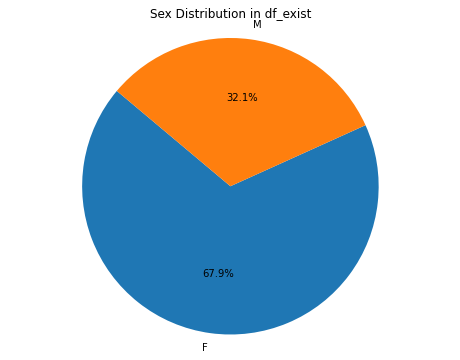

In [ ]:
country_counts = df_exist['sex'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sex Distribution in df_exist')
plt.axis('equal')
plt.show()

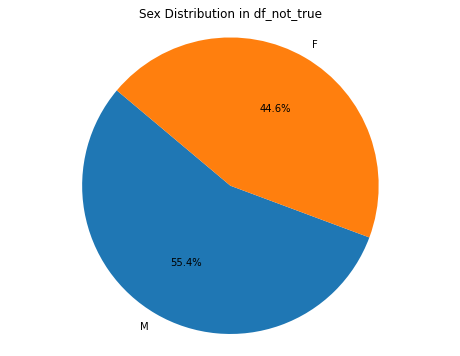

In [ ]:
country_counts = df_not_true['sex'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sex Distribution in df_not_true')
plt.axis('equal')
plt.show()

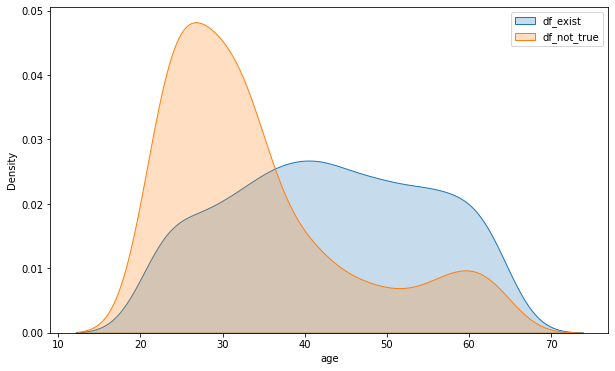

In [156]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_exist, x='age', fill=True, label='df_exist')
sns.kdeplot(data=df_not_true, x='age', fill=True, label='df_not_true')
plt.legend()

In [132]:
df.columns

Index(['person', 'country', 'salary', 'age', 'sex', 'cluster', 'prob',
       'tup_prov', 'block_prov'],
      dtype='object')